
Problem Statement 

-Using Brent Oil	Crude Oil WTI	Gold	S&P500 price build model to predict wether Bitcoin Prices would closer higher or lower as compared to previous day


**1. Load Libraries**

In [81]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools


##### Scikit Learn modules needed for Decision Trees
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import graphviz


**2. Load and Explore  Data**

In [3]:
df=pd.read_csv("/content/SP500 oil gold bitcoin.csv")

In [4]:
df.head()

,Date,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
0,2010-07-18,0.1,75.37,76.01,1188.0,1064.88
1,2010-07-19,0.1,75.62,76.54,1181.7,1071.25
2,2010-07-20,0.1,76.22,77.44,1191.5,1083.48
3,2010-07-21,0.1,75.37,76.56,1191.6,1069.59
4,2010-07-22,0.1,77.82,79.30,1195.5,1093.67


In [5]:
df.tail()

,Date,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
4349,2022-06-14,22157.3,121.17,118.93,1813.5,3735.48
4350,2022-06-15,22577.9,118.51,115.31,1819.6,3789.99
4351,2022-06-16,20386.6,119.81,117.59,1849.9,3666.77
4352,2022-06-17,20444.6,113.12,109.56,1840.6,3674.84
4353,2022-06-18,19117.8,113.12,109.56,1840.6,3674.84


In [12]:
print(f"Shape of data--->{df.shape}")

Shape of data--->(4354, 6)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4354 entries, 0 to 4353
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4354 non-null   object 
 1   BITCOIN        4354 non-null   float64
 2   Brent Oil      4354 non-null   float64
 3   Crude Oil WTI  4354 non-null   float64
 4   Gold           4354 non-null   float64
 5   S&P500         4354 non-null   float64
dtypes: float64(5), object(1)
memory usage: 204.2+ KB


In [7]:
df.describe()

,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
count,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000
mean,8101.018443,77.202317,68.978647,1458.146066,2390.808128
std,14611.248115,26.611154,22.908265,244.511779,942.247820
min,0.100000,19.330000,26.210000,1049.700000,1047.220000
25%,118.500000,55.160000,50.832500,1266.400000,1652.327500
50%,655.500000,71.535000,58.000000,1358.750000,2125.810000
75%,8561.625000,106.890000,92.720000,1672.150000,2887.452500
max,67527.900000,127.980000,122.110000,2054.600000,4796.560000


In [8]:
df.corr()

,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
BITCOIN,1.000000,-0.087595,-0.088936,0.594622,0.862225
Brent Oil,-0.087595,1.000000,0.967340,0.248812,-0.382941
Crude Oil WTI,-0.088936,0.967340,1.000000,0.242430,-0.384042
Gold,0.594622,0.248812,0.242430,1.000000,0.445658
S&P500,0.862225,-0.382941,-0.384042,0.445658,1.000000


Strong Correlation between Brent Oil & Crude Oil WTI,BIT Coin & Gold , Bit Coin & S&P500

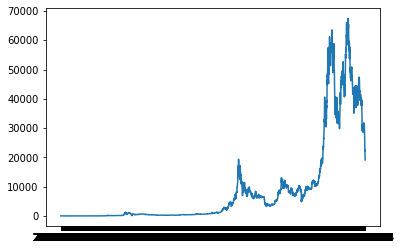

In [137]:
plt.plot(df['Date'],df['BITCOIN'])

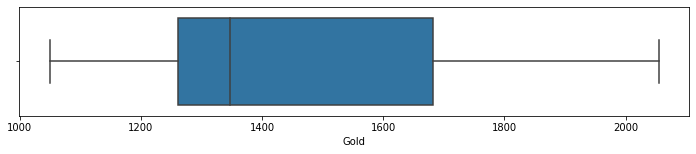

In [138]:
fig = plt.subplots(figsize = (12, 2))
ax = sns.boxplot(x = df['Gold'])

In [139]:
#Calculating EWMA on the open prices; for 200 days
df["ewm200"]=df['Gold'].ewm(span=200,min_periods = 0,adjust = False,ignore_na = False).mean()

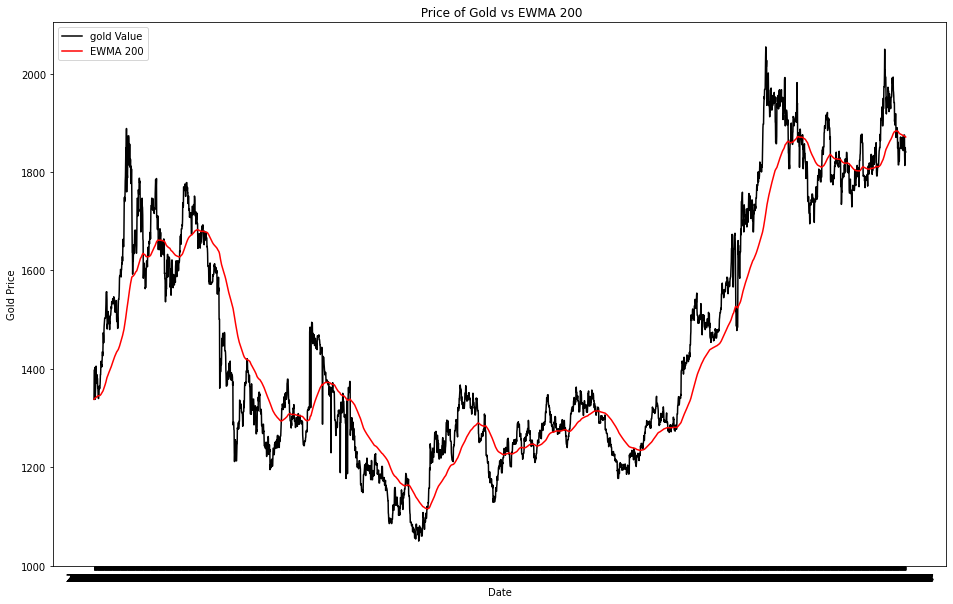

In [141]:
plt.figure(figsize = (16,10))
plt.plot(df.Date, df.Gold, color = "black", label = "gold Value")
plt.plot(df.Date, df.ewm200, color = "red", label = "EWMA 200")
plt.title(" Price of Gold vs EWMA 200")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.show()

In [14]:
df.tail(2)

,Date,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
4352,2022-06-17,20444.6,113.12,109.56,1840.6,3674.84
4353,2022-06-18,19117.8,113.12,109.56,1840.6,3674.84


In [17]:
df['pct_chag']=df['BITCOIN'].pct_change()
df.head(),df.tail()

(         Date  BITCOIN  Brent Oil  Crude Oil WTI    Gold   S&P500  pct_chag
 0  2010-07-18      0.1      75.37          76.01  1188.0  1064.88       NaN
 1  2010-07-19      0.1      75.62          76.54  1181.7  1071.25       0.0
 2  2010-07-20      0.1      76.22          77.44  1191.5  1083.48       0.0
 3  2010-07-21      0.1      75.37          76.56  1191.6  1069.59       0.0
 4  2010-07-22      0.1      77.82          79.30  1195.5  1093.67       0.0,
             Date  BITCOIN  Brent Oil  Crude Oil WTI    Gold   S&P500  pct_chag
 4349  2022-06-14  22157.3     121.17         118.93  1813.5  3735.48 -0.012950
 4350  2022-06-15  22577.9     118.51         115.31  1819.6  3789.99  0.018982
 4351  2022-06-16  20386.6     119.81         117.59  1849.9  3666.77 -0.097055
 4352  2022-06-17  20444.6     113.12         109.56  1840.6  3674.84  0.002845
 4353  2022-06-18  19117.8     113.12         109.56  1840.6  3674.84 -0.064897)

In [18]:
df.dropna(subset=['pct_chag'],inplace=True)

In [19]:
df.head(),df.tail()

(         Date  BITCOIN  Brent Oil  Crude Oil WTI    Gold   S&P500  pct_chag
 1  2010-07-19      0.1      75.62          76.54  1181.7  1071.25       0.0
 2  2010-07-20      0.1      76.22          77.44  1191.5  1083.48       0.0
 3  2010-07-21      0.1      75.37          76.56  1191.6  1069.59       0.0
 4  2010-07-22      0.1      77.82          79.30  1195.5  1093.67       0.0
 5  2010-07-23      0.1      77.45          78.98  1187.7  1102.66       0.0,
             Date  BITCOIN  Brent Oil  Crude Oil WTI    Gold   S&P500  pct_chag
 4349  2022-06-14  22157.3     121.17         118.93  1813.5  3735.48 -0.012950
 4350  2022-06-15  22577.9     118.51         115.31  1819.6  3789.99  0.018982
 4351  2022-06-16  20386.6     119.81         117.59  1849.9  3666.77 -0.097055
 4352  2022-06-17  20444.6     113.12         109.56  1840.6  3674.84  0.002845
 4353  2022-06-18  19117.8     113.12         109.56  1840.6  3674.84 -0.064897)

In [20]:
df=df[df['pct_chag']!=0]
print(f"Shape of data--->{df.shape}")


Shape of data--->(3953, 7)


In [21]:
df.head()

,Date,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500,pct_chag
100,2010-10-26,0.2,83.66,82.55,1338.0,1185.64,1.000000
110,2010-11-05,0.3,88.11,86.85,1397.3,1225.85,0.500000
111,2010-11-06,0.4,88.11,86.85,1397.3,1225.85,0.333333
112,2010-11-07,0.3,88.11,86.85,1397.3,1225.85,-0.250000
113,2010-11-08,0.2,88.46,87.06,1402.8,1223.25,-0.333333


Here negative sign in pct_chag , indicates that yesterday value was more than todays value.

In [22]:
df['target']=df['pct_chag'].apply(lambda x : 'H' if(x>0) else 'L' )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.head()

,Date,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500,pct_chag,target
100,2010-10-26,0.2,83.66,82.55,1338.0,1185.64,1.000000,H
110,2010-11-05,0.3,88.11,86.85,1397.3,1225.85,0.500000,H
111,2010-11-06,0.4,88.11,86.85,1397.3,1225.85,0.333333,H
112,2010-11-07,0.3,88.11,86.85,1397.3,1225.85,-0.250000,L
113,2010-11-08,0.2,88.46,87.06,1402.8,1223.25,-0.333333,L


Now its became Classification kind of problemstatement.

In [27]:
df.columns

Index(['Date', 'BITCOIN', 'Brent Oil', 'Crude Oil WTI', 'Gold', 'S&P500',
       'pct_chag', 'target'],
      dtype='object')

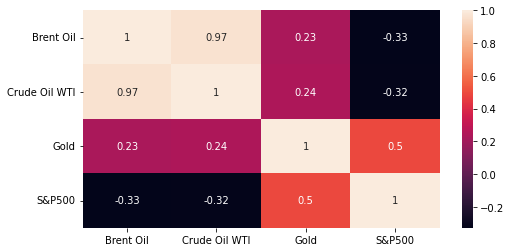

In [41]:
#Explore Data Visuality
#Build Corelation Matrix
correlation=df[['Brent Oil','Crude Oil WTI','Gold','S&P500']].corr()
#print(corelation)

fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(4)
sns.heatmap(correlation,annot=True)

**3.Build a Single Decision Tree :: Baseline Model**

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df[['Brent Oil','Crude Oil WTI','Gold','S&P500']],df['target'],test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(3162, 4)
Shape of Test Xs:(791, 4)
Shape of Training y:(3162,)
Shape of Test y:(791,)


In [50]:
dt=DecisionTreeClassifier(random_state=111)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
score=dt.score(x_test,y_test)
print(f"Accuracy of Decision Tree--->{score*100}%")

Accuracy of Decision Tree--->51.580278128950695%


Here added random_state in classifier , if you recollect gain in decision tree we always randomly chosses the feature  and do compirsation,calculatively check information gain, so there found be slight difference..


**4. Create Random Forest Model-Default Model**

In [65]:
rf=RandomForestClassifier(random_state=111)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
score=rf.score(x_test,y_test)
print(f"Accuracy of Random Forest Tree--->{score*100}%")

Accuracy of Random Forest Tree--->51.70670037926675%


In [ ]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

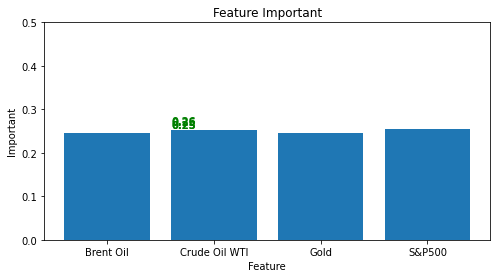

In [64]:
variableImp=pd.DataFrame({"Feature":['Brent Oil','Crude Oil WTI','Gold','S&P500'],"Importance":rf.feature_importances_})
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(4)
ax.bar(x=variableImp.Feature,height=variableImp.Importance)
ax.set_title("Feature Important")
ax.set_xlabel("Feature")
ax.set_ylabel("Important")
ax.set_ylim(top=0.5)
for i ,v in enumerate(variableImp.Importance):
    ax.text(1-0.4,v+0.01,s=np.round(v,2),color='green',fontweight='bold',fontsize=10)


In [72]:
#Confusion Matrix
#cnf_matrix=confusion_matrix(true_labels,y_predicted_labels)
cnf_matrix=confusion_matrix(y_test,y_pred_rf)
np.set_printoptions(precision=2)
cnf_matrix



array([[234, 197],
       [185, 175]])

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[234 197]
 [185 175]]
Normalized confusion matrix
[[0.54 0.46]
 [0.51 0.49]]


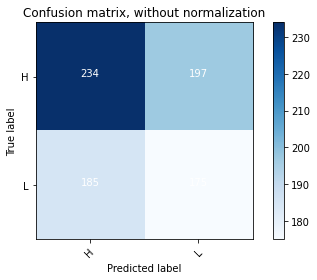

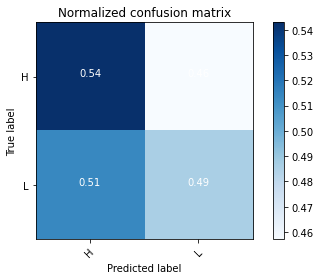

In [83]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix,classes= ['H','L'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ['H','L'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

with confusion matrix performace is relatively simillar

Model prediction of 'Heigher' closer for the days are slighter more than prediction of 'lower'closer for the days 

**5. Hyper Parameter Tuning**

In [134]:
# We create the preprocessing pipelines for both numeric and categorical data.
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
 #    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#preprocessor = ColumnTransformer(
 #   transformers=[
  #      ('num', numeric_transformer, numeric_features),
#        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

In [135]:
rf .fit(x_train,y_train)
y_pred_rf =rf.predict(x_test)
score=rf.score(x_test,y_test)
print(f"Accuracy of Random Forest Tree--->{score*100}%")

Accuracy of Random Forest Tree--->52.338811630847026%


In [136]:
param_grid = {
    'preprocessor__imputer__strategy': ['mean', 'median'],
    'preprocessor__scaler': ['StandardScaler()','MinMaxScaler()'],
    'classifier__criterion': ["gini","entropy"],
    'classifier__max_depth' :[2,4,6,8,10,12],
    'classifier__n_estimators': [100,300,500]
}

grid_search = GridSearchCV(rf, param_grid, cv=2, verbose= 3 , n_jobs = -1)
grid_search.fit(x_train, y_train)

print(("best Decision Tree from grid search: %.3f"
       % grid_search.score(x_test, y_test)))
print(f"Optimum Parameters are as follows --------------\n{grid_search.best_params_}")

Fitting 2 folds for each of 144 candidates, totalling 288 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 316, in _fit
    self._validate_steps()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", li

TypeError: ignored

In [112]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rf_p)
np.set_printoptions(precision=2)
cnf_matrix

array([[234, 197],
       [185, 175]])

In [113]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[234 197]
 [185 175]]
Normalized confusion matrix
[[0.54 0.46]
 [0.51 0.49]]


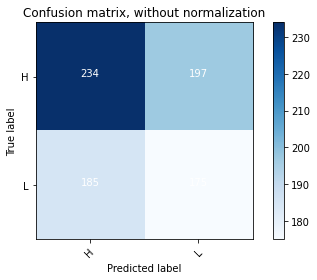

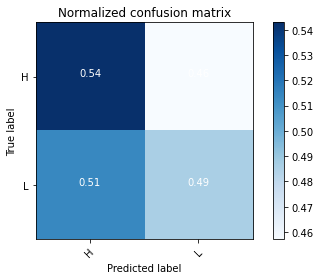

In [114]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['H','L'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['H','L'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**6. Conclusion**